In [389]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [390]:
df = pd.read_csv('Furniture.csv')
df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733


In [391]:
df.shape

(2500, 15)

In [392]:
df.columns

Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
       'discount_percentage', 'delivery_days', 'category', 'material', 'color',
       'location', 'season', 'store_type', 'brand', 'revenue'],
      dtype='object')

In [393]:
df.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [395]:
df.isna().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
revenue                0
dtype: int64

In [396]:
df.describe()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,274.495219,191.930107,24.924000,30.208571,97.715600,14.947616,4.89400,5926.853657
std,130.898452,98.590751,14.050067,11.536804,57.616228,8.621547,2.55902,6902.737604
min,50.704297,26.505895,1.000000,10.017692,0.000000,0.005556,1.00000,-14214.565505
25%,159.104890,106.399135,13.000000,20.230697,50.000000,7.760214,3.00000,1216.719195
50%,277.641809,189.336329,25.000000,30.297911,94.000000,14.915143,5.00000,5523.232714
75%,387.378046,263.188280,37.000000,40.134205,147.000000,22.292661,7.00000,10233.537982
max,499.872953,447.022911,49.000000,49.999535,199.000000,29.991229,9.00000,32922.078832


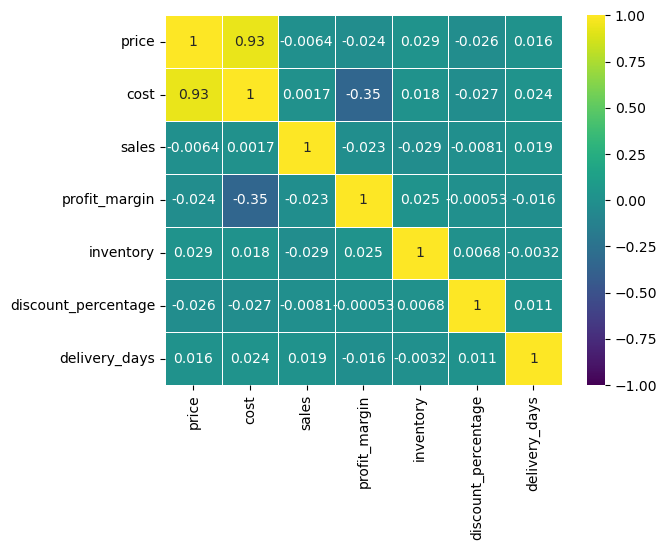

In [397]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, cmap='viridis', annot=True, vmin=-1, vmax=1, linewidth=.5)
plt.show()

In [398]:
ls = df.select_dtypes(include=np.number).columns
ls, len(ls)

(Index(['price', 'cost', 'sales', 'profit_margin', 'inventory',
        'discount_percentage', 'delivery_days', 'revenue'],
       dtype='object'),
 8)

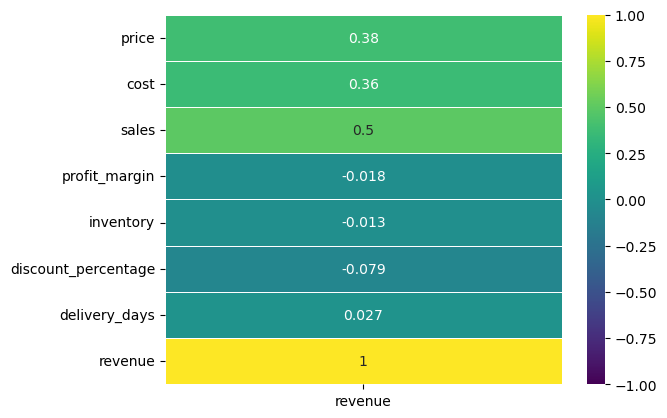

In [399]:
corr_with_target = df[ls].corr()[['revenue']]
sns.heatmap(corr_with_target, cmap='viridis', annot=True, vmin=-1, vmax=1, linewidth=.5)
plt.show()

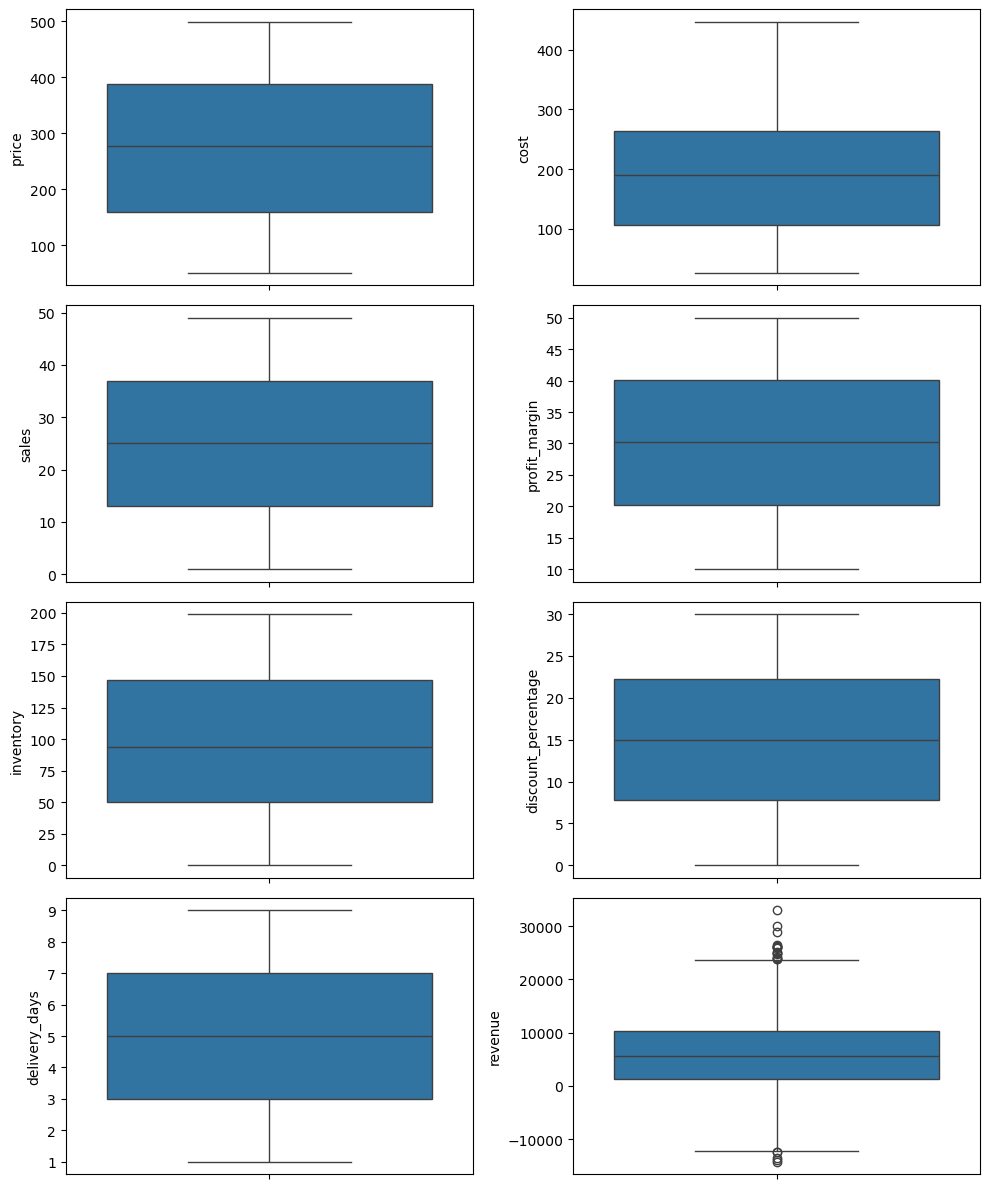

In [400]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(ls):
    sns.boxplot(df[col], ax=axes[i])
    
plt.tight_layout()
plt.show()

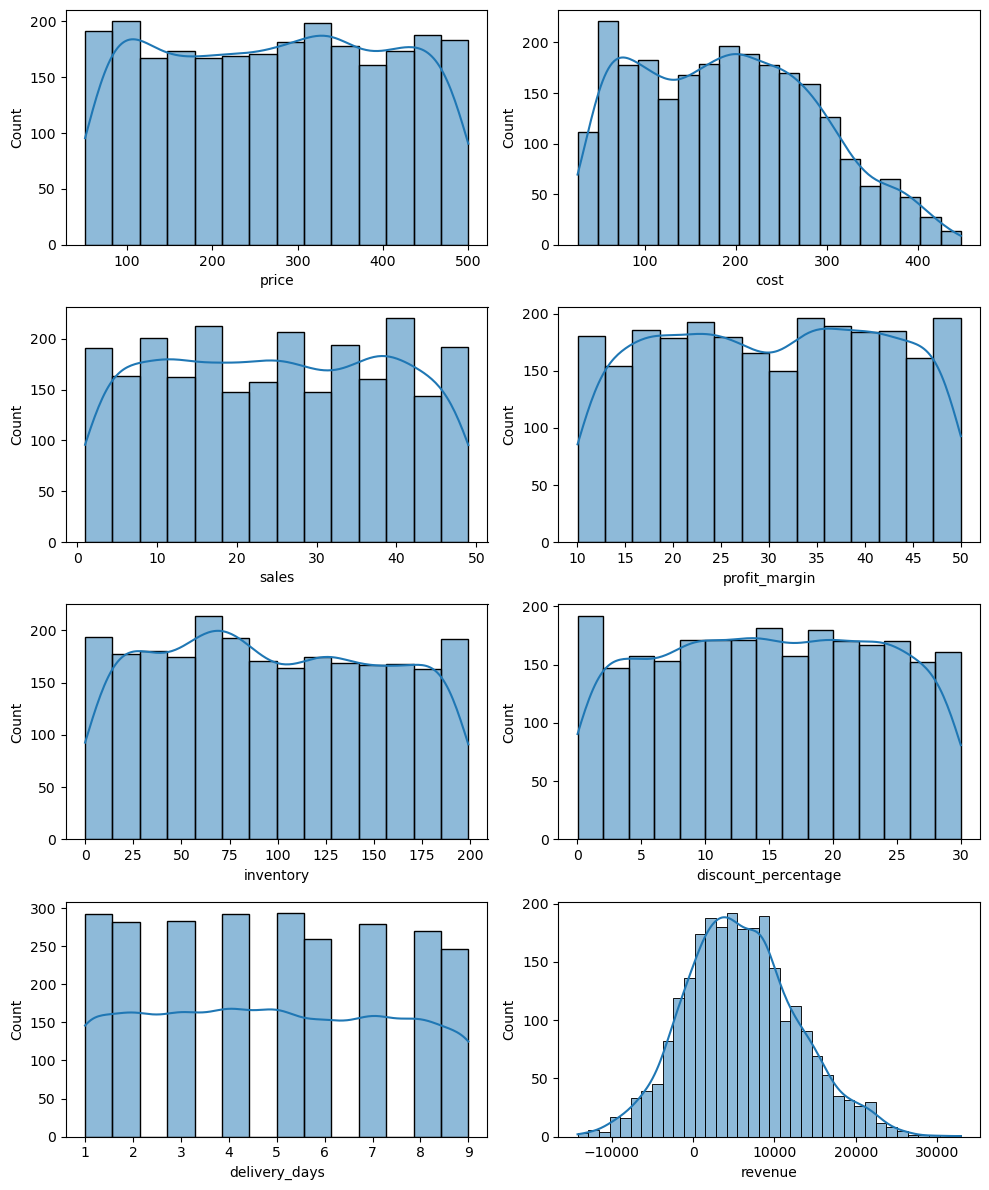

In [401]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(ls):
    sns.histplot(df[col], ax=axes[i], kde=True)
    
plt.tight_layout()
plt.show()

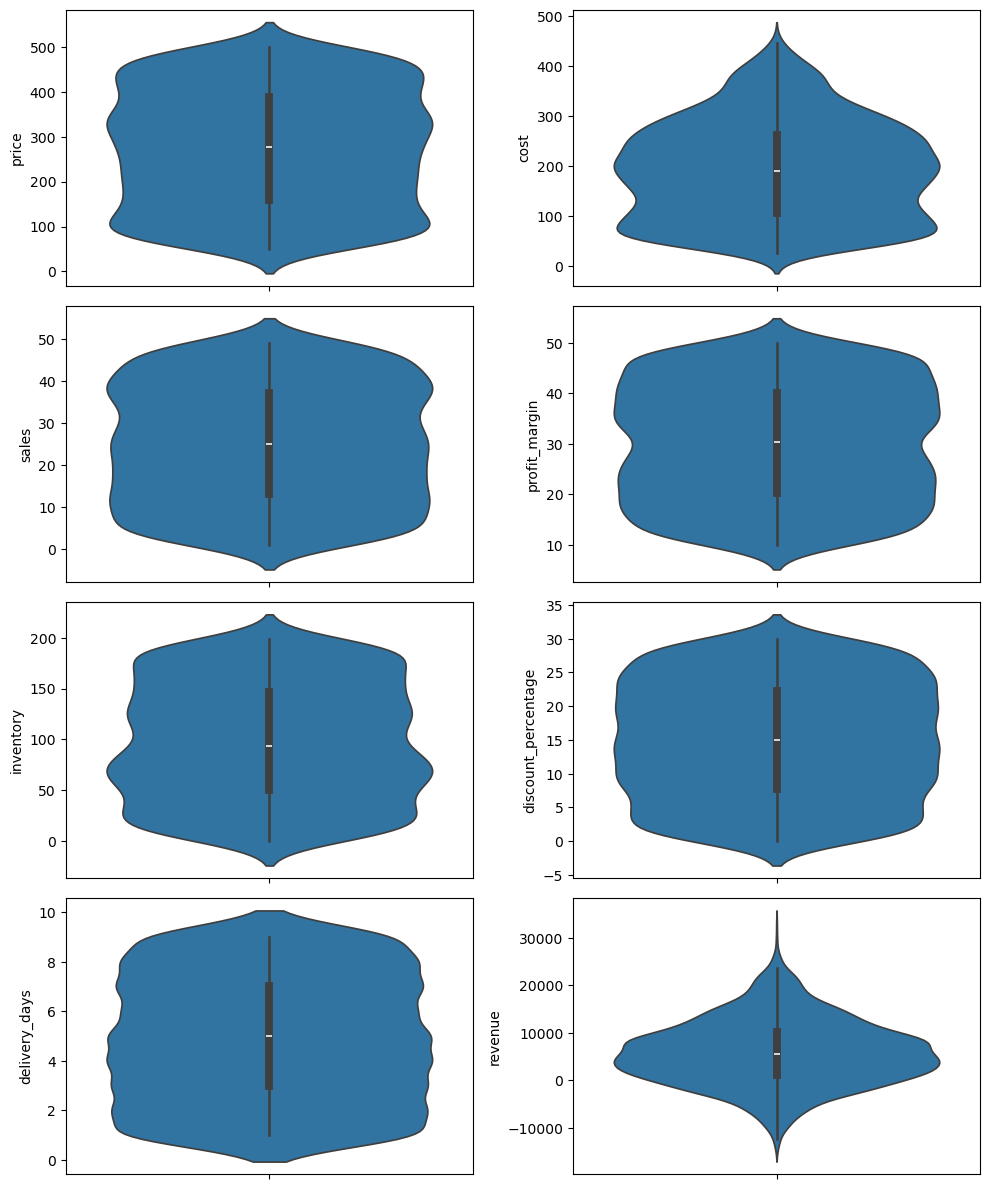

In [402]:
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
axes = axes.flatten()

for i, col in enumerate(ls):
    sns.violinplot(df[col], ax=axes[i])
    
plt.tight_layout()
plt.show()

In [403]:
X = df.drop('revenue', axis=1)
y = df['revenue']

In [404]:
X.isnull().sum()

price                  0
cost                   0
sales                  0
profit_margin          0
inventory              0
discount_percentage    0
delivery_days          0
category               0
material               0
color                  0
location               0
season                 0
store_type             0
brand                  0
dtype: int64

In [405]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
len(num_cols), len(cat_cols)

(7, 7)

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [407]:
X_train.shape

(2000, 14)

In [408]:
enc = OneHotEncoder(sparse_output=False)
encoded_cats = enc.fit_transform(X_train[cat_cols])
encoded_X_train = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(cat_cols))

print("Encoded shape:", encoded_X_train.shape)

combined_X_train = pd.concat([X_train.drop(cat_cols, axis=1).reset_index(drop=True), encoded_X_train.reset_index(drop=True)], axis=1)
combined_X_train.head()

Encoded shape: (2000, 29)


,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category_Bed,category_Chair,category_Desk,...,season_Fall,season_Spring,season_Summer,season_Winter,store_type_Online,store_type_Retail,brand_BrandA,brand_BrandB,brand_BrandC,brand_BrandD
0,259.519108,229.479976,11,11.574921,106,4.178901,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,350.695759,237.365905,2,32.315719,187,28.249046,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,104.917206,80.095495,44,23.658379,91,21.484463,9,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,228.308909,189.561321,24,16.971562,169,28.426016,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,316.827883,187.737076,22,40.744775,151,13.378419,4,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [409]:
combined_X_train.shape

(2000, 36)

In [411]:
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(combined_X_train[num_cols]), columns=num_cols)
final_X_train = pd.concat([scaled_X_train, combined_X_train.drop(num_cols, axis=1)], axis=1)
final_X_train.sample(5)

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category_Bed,category_Chair,category_Desk,...,season_Fall,season_Spring,season_Summer,season_Winter,store_type_Online,store_type_Retail,brand_BrandA,brand_BrandB,brand_BrandC,brand_BrandD
1047,1.377018,1.687617,-1.220300,-0.773200,-0.870677,-0.900184,-0.337333,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
188,-1.596841,-1.570709,1.480265,1.109703,0.065656,-0.906383,-0.337333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
251,-1.622299,-1.412874,-1.220300,-1.346060,0.499143,-0.305800,-0.337333,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1686,-1.103208,-0.884795,1.195995,-0.942417,-0.714621,-0.562959,-1.121373,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
327,1.718183,0.614946,0.911725,1.677706,-0.246455,-1.245612,-1.121373,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [413]:
final_X_train.shape

(2000, 36)

In [414]:
l1 = Lasso(alpha=0.3)
l1.fit(final_X_train, y_train)

for feature, coef in zip(final_X_train.columns, l1.coef_):
    print(f"{feature}: {coef}")

price: 2936.754436261843
cost: -194.69405811951822
sales: 3370.936454572221
profit_margin: -42.108163835197395
inventory: 13.524732479117672
discount_percentage: -464.72730265089547
delivery_days: 55.05928244796661
category_Bed: 258.8029311113734
category_Chair: 0.0
category_Desk: -384.5096127039647
category_Sofa: -11.032436972131
category_Table: 550.8944793488939
material_Fabric: -412.44656687163547
material_Glass: -0.0
material_Metal: 425.01376903489745
material_Plastic: 626.7900111560192
material_Wood: -116.3361019408542
color_Black: 156.02685876295047
color_Blue: 189.13509495918296
color_Brown: 218.3184956684044
color_Green: -457.5179596513126
color_Red: -727.6075736458911
color_White: -0.0
location_Rural: -12.243920462482214
location_Suburban: 427.53475417561066
location_Urban: 0.0
season_Fall: 147.2868988964214
season_Spring: 304.04698163340106
season_Summer: -2.1964289035419853
season_Winter: -103.82004964436993
store_type_Online: -162.96905606722984
store_type_Retail: 8.7375187

In [415]:
l1_series = pd.Series(l1.coef_, index=final_X_train.columns)
selected_features = l1_series[l1_series != 0 ].index
final_X_train = final_X_train[selected_features]
final_X_train.shape

(2000, 32)

In [416]:
encoded_cats = enc.transform(X_test[cat_cols])
encoded_X_test = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(cat_cols))
combined_X_test = pd.concat([X_test.drop(cat_cols, axis=1), encoded_X_test], axis=1)

scaled_X_test = pd.DataFrame(scaler.transform(combined_X_test[num_cols]), columns=num_cols)
final_X_test = pd.concat([scaled_X_test, combined_X_test.drop(num_cols, axis=1)], axis=1)

final_X_test.dropna(inplace=True)

final_X_test = final_X_test[selected_features]

final_X_test.shape

(500, 32)

In [417]:
lr = LinearRegression()

lr.fit(final_X_train, y_train)
lr_pred = lr.predict(final_X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Mean Squared Error: {lr_mse}")
print(f"Mean Abslute Error: {lr_mae}")
print(f"R2 Score: {lr_r2}")

Mean Squared Error: 28153483.5928515
Mean Abslute Error: 4263.34090809869
R2 Score: 0.38849623066766303


In [418]:
knn = KNeighborsRegressor()

params = {
    'n_neighbors': [7, 9, 11, 13, 15, 17]
}

grid = GridSearchCV(knn, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, y_train)

print(grid.best_params_)

knn = grid.best_estimator_
knn_pred = knn.predict(final_X_test)

knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print(f"Mean Squared Error: {knn_mse}")
print(f"Mean Abslute Error: {knn_mae}")
print(f"R2 Score: {knn_r2}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_neighbors': 17}
Mean Squared Error: 29220431.471336816
Mean Abslute Error: 4266.522325280257
R2 Score: 0.36532173976592


In [419]:
tree = DecisionTreeRegressor()

params = {
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(tree, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, y_train)

print(grid.best_params_)

tree = grid.best_estimator_
tree_pred = tree.predict(final_X_test)

tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

print(f"Mean Squared Error: {tree_mse}")
print(f"Mean Abslute Error: {tree_mae}")
print(f"R2 Score: {tree_r2}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'max_depth': 3}
Mean Squared Error: 27767984.177333888
Mean Abslute Error: 4229.8606414522565
R2 Score: 0.3968694163477573


In [420]:
forest = RandomForestRegressor()

params = {
    'n_estimators': [50, 100, 200],
    'bootstrap': [True, False]
}

grid = GridSearchCV(forest, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, y_train)

print(grid.best_params_)

forest = grid.best_estimator_
forest_pred = forest.predict(final_X_test)

forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

print(f"Mean Squared Error: {forest_mse}")
print(f"Mean Abslute Error: {forest_mae}")
print(f"R2 Score: {forest_r2}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'bootstrap': True, 'n_estimators': 100}
Mean Squared Error: 25732660.821766417
Mean Abslute Error: 4052.9682160779594
R2 Score: 0.441077370210194


In [421]:
importance = permutation_importance(forest, final_X_test, y_test)

In [422]:
imp = importance.importances_mean
imp_series = pd.Series(imp, index=final_X_test.columns)
imp_series = imp_series.sort_values(ascending=False)

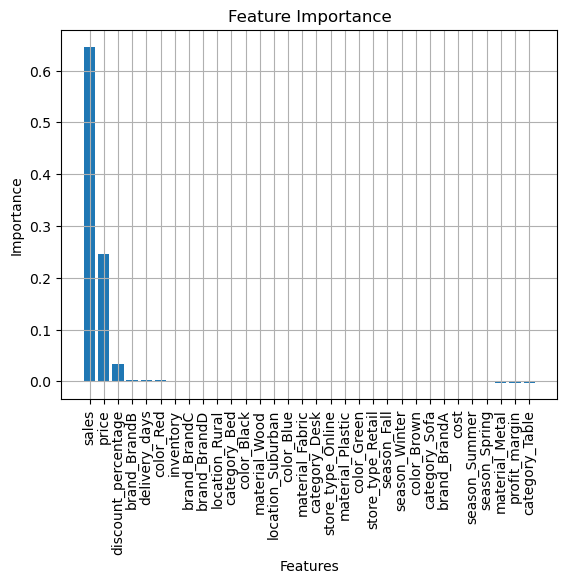

In [423]:
plt.bar(imp_series.index, imp_series.values)
plt.grid()
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()